In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/indeed-job-listings.csv')

In [3]:
df.head(5)

,body,city,company,country,expired,index_url,job_title,listing_url,location,post_date,state,status_code,summary,views
0,"World Wildlife Fund (WWF), the worldâs leadi...",Washington,World Wildlife Fund,US,False,http://api.indeed.com/ads/apisearch?publisher=...,IN-16092 Conservation Data Analysis Intern,http://www.indeed.com/viewjob?jk=7e8fe74842451...,"Washington, DC US","Mon, 25 Apr 2016 21:36:16 GMT",DC,200,"Data management, including updating database m...",17.0
1,"Job Description\n\nThe Weather Company, an IBM...",Boston,IBM,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Data Science Analyst for The Weather Company,http://www.indeed.com/viewjob?jk=4332542420d6b...,"Boston, MA US","Thu, 03 Mar 2016 04:06:28 GMT",MA,200,"Provide expertise in data acquisition, data qu...",10735.0
2,Job Number: 01203341\n\n\nDescription\n\n\nSo ...,Washington,Booz Allen Hamilton,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Data Scientist,http://www.indeed.com/viewjob?jk=5df3246825de1...,"Washington, DC US","Fri, 15 Apr 2016 07:31:57 GMT",DC,200,Our Data Science team:. Experience in working ...,863.0
3,everis is a multinational consulting firm prov...,Washington,Everis USA,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Healthcare Data Analyst,http://www.indeed.com/viewjob?jk=ba266f8cb3fa7...,"Washington, DC US","Mon, 25 Apr 2016 19:56:40 GMT",DC,200,The Healthcare Data Analyst understands health...,10.0
4,CHASE Professionals is currently representing ...,Duluth,CHASE Professionals,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Sr. Data Scientist,http://www.indeed.com/viewjob?jk=fd9df86861b6e...,"Duluth, GA US","Mon, 25 Apr 2016 14:28:26 GMT",GA,200,Strong understanding of algorithms and advance...,147.0


In [4]:
df.columns

Index(['body', 'city', 'company', 'country', 'expired', 'index_url',
       'job_title', 'listing_url', 'location', 'post_date', 'state',
       'status_code', 'summary', 'views'],
      dtype='object')

In [5]:
df.isna().sum()

body            0
city            0
company         0
country         0
expired         0
index_url       0
job_title       0
listing_url     0
location        0
post_date       0
state           0
status_code     0
summary         0
views          17
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   body         100 non-null    object 
 1   city         100 non-null    object 
 2   company      100 non-null    object 
 3   country      100 non-null    object 
 4   expired      100 non-null    bool   
 5   index_url    100 non-null    object 
 6   job_title    100 non-null    object 
 7   listing_url  100 non-null    object 
 8   location     100 non-null    object 
 9   post_date    100 non-null    object 
 10  state        100 non-null    object 
 11  status_code  100 non-null    int64  
 12  summary      100 non-null    object 
 13  views        83 non-null     float64
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 10.4+ KB


In [7]:
df['views'].value_counts()
df['views'] = df['views'].fillna(0).astype(int)

In [8]:
#missing value with mean 
df['views'] =df['views'].fillna(df['views'].mean())

In [9]:
df.isna().sum()

body           0
city           0
company        0
country        0
expired        0
index_url      0
job_title      0
listing_url    0
location       0
post_date      0
state          0
status_code    0
summary        0
views          0
dtype: int64

In [10]:
df['location'].value_counts()

location
Washington, DC US             23
New York, NY US                7
Arlington, VA US               6
Springfield, VA US             5
McLean, VA US                  4
Alexandria, VA US              3
Austin, TX US                  3
Annapolis Junction, MD US      3
San Jose, CA US                2
Phoenix, AZ US                 2
Philadelphia, PA US            2
Falls Church, VA US            2
Fort George G Meade, MD US     2
Greenbelt, MD US               2
San Antonio, TX US             2
Chicago, IL US                 2
Tampa, FL US                   1
Duluth, GA US                  1
Boston, MA US                  1
Reston, VA US                  1
Fairfax, VA US                 1
College Park, MD US            1
Golden, CO US                  1
Glendale, CA US                1
Kannapolis, NC US              1
San Diego, CA US               1
Columbus, IN US                1
Wilmington, DE US              1
Folsom, CA US                  1
Fort Worth, TX US              1
L

In [11]:
location_with_high_jobs = df['location'].value_counts().head(1).index.values
print(location_with_high_jobs)

['Washington, DC US']


In [12]:
df.columns

Index(['body', 'city', 'company', 'country', 'expired', 'index_url',
       'job_title', 'listing_url', 'location', 'post_date', 'state',
       'status_code', 'summary', 'views'],
      dtype='object')

In [13]:
df['state'].value_counts()

state
VA    24
DC    23
MD    10
CA     9
NY     8
TX     6
GA     3
IL     3
FL     2
PA     2
AZ     2
NC     2
CO     2
MA     1
IN     1
DE     1
WA     1
Name: count, dtype: int64

In [14]:
df['company'].value_counts()

company
Booz Allen Hamilton                               5
U.S. Federal Government                           3
KPMG                                              3
National Security Agency                          2
World Wildlife Fund                               2
                                                 ..
State Farm Mutual Automobile Insurance Company    1
CSC                                               1
Qphase Technologies                               1
Hobsons                                           1
Department Of Veterans Affairs                    1
Name: count, Length: 77, dtype: int64

In [15]:
df['city'] =df['city'].str.strip().str.title()
df['state'] = df['state'].str.upper()
df['company'] = df['company'].str.strip().str.title()

In [16]:
df.head(5)

,body,city,company,country,expired,index_url,job_title,listing_url,location,post_date,state,status_code,summary,views
0,"World Wildlife Fund (WWF), the worldâs leadi...",Washington,World Wildlife Fund,US,False,http://api.indeed.com/ads/apisearch?publisher=...,IN-16092 Conservation Data Analysis Intern,http://www.indeed.com/viewjob?jk=7e8fe74842451...,"Washington, DC US","Mon, 25 Apr 2016 21:36:16 GMT",DC,200,"Data management, including updating database m...",17
1,"Job Description\n\nThe Weather Company, an IBM...",Boston,Ibm,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Data Science Analyst for The Weather Company,http://www.indeed.com/viewjob?jk=4332542420d6b...,"Boston, MA US","Thu, 03 Mar 2016 04:06:28 GMT",MA,200,"Provide expertise in data acquisition, data qu...",10735
2,Job Number: 01203341\n\n\nDescription\n\n\nSo ...,Washington,Booz Allen Hamilton,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Data Scientist,http://www.indeed.com/viewjob?jk=5df3246825de1...,"Washington, DC US","Fri, 15 Apr 2016 07:31:57 GMT",DC,200,Our Data Science team:. Experience in working ...,863
3,everis is a multinational consulting firm prov...,Washington,Everis Usa,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Healthcare Data Analyst,http://www.indeed.com/viewjob?jk=ba266f8cb3fa7...,"Washington, DC US","Mon, 25 Apr 2016 19:56:40 GMT",DC,200,The Healthcare Data Analyst understands health...,10
4,CHASE Professionals is currently representing ...,Duluth,Chase Professionals,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Sr. Data Scientist,http://www.indeed.com/viewjob?jk=fd9df86861b6e...,"Duluth, GA US","Mon, 25 Apr 2016 14:28:26 GMT",GA,200,Strong understanding of algorithms and advance...,147


In [17]:
company_who_posted_most_jobs = df['company'].mode()[0]
print(company_who_posted_most_jobs)

Booz Allen Hamilton


In [18]:
company_who_posted_most_jobs = df['company'].value_counts().idxmax()
print(company_who_posted_most_jobs)

Booz Allen Hamilton


In [19]:
df['job_title'].value_counts()

job_title
Data Scientist                                                     31
Data Science Intern                                                 6
Data Analyst                                                        5
Data Analyst - Data Science Office                                  2
Science Education Administrator (Program Director)                  2
Associate All-Source Geospatial Data Scientist                      2
IN-16093 Conservation Data Visualization Intern                     1
Sr. Data Scientist                                                  1
Data Science Analyst for The Weather Company                        1
IN-16092 Conservation Data Analysis Intern                          1
Statistical Data Analyst                                            1
Data Science Summer Intern                                          1
Data Scientist/Analyst                                              1
Data Scientist - Entry Level                                        1
Applied Ma

In [20]:
def standardize_job_title(title):
    title = str(title).lower().strip()
    
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'intern' in title and 'data' in title:
        return 'Data Science Intern'
    elif 'machine learning' in title:
        return 'Machine Learning Engineer'
    elif 'manager' in title and ('analytics' in title or 'data' in title):
        return 'Analytics Manager'
    elif 'engineer' in title and 'data' in title:
        return 'Data Engineer'
    else:
        return 'Other'

df['job_title_standardized'] = df['job_title'].apply(standardize_job_title)
df['job_title_standardized'].value_counts()

job_title_standardized
Data Scientist               48
Other                        20
Data Science Intern          11
Data Analyst                 10
Analytics Manager             5
Data Engineer                 4
Machine Learning Engineer     2
Name: count, dtype: int64

In [21]:
df.head(5)

,body,city,company,country,expired,index_url,job_title,listing_url,location,post_date,state,status_code,summary,views,job_title_standardized
0,"World Wildlife Fund (WWF), the worldâs leadi...",Washington,World Wildlife Fund,US,False,http://api.indeed.com/ads/apisearch?publisher=...,IN-16092 Conservation Data Analysis Intern,http://www.indeed.com/viewjob?jk=7e8fe74842451...,"Washington, DC US","Mon, 25 Apr 2016 21:36:16 GMT",DC,200,"Data management, including updating database m...",17,Data Science Intern
1,"Job Description\n\nThe Weather Company, an IBM...",Boston,Ibm,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Data Science Analyst for The Weather Company,http://www.indeed.com/viewjob?jk=4332542420d6b...,"Boston, MA US","Thu, 03 Mar 2016 04:06:28 GMT",MA,200,"Provide expertise in data acquisition, data qu...",10735,Other
2,Job Number: 01203341\n\n\nDescription\n\n\nSo ...,Washington,Booz Allen Hamilton,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Data Scientist,http://www.indeed.com/viewjob?jk=5df3246825de1...,"Washington, DC US","Fri, 15 Apr 2016 07:31:57 GMT",DC,200,Our Data Science team:. Experience in working ...,863,Data Scientist
3,everis is a multinational consulting firm prov...,Washington,Everis Usa,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Healthcare Data Analyst,http://www.indeed.com/viewjob?jk=ba266f8cb3fa7...,"Washington, DC US","Mon, 25 Apr 2016 19:56:40 GMT",DC,200,The Healthcare Data Analyst understands health...,10,Data Analyst
4,CHASE Professionals is currently representing ...,Duluth,Chase Professionals,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Sr. Data Scientist,http://www.indeed.com/viewjob?jk=fd9df86861b6e...,"Duluth, GA US","Mon, 25 Apr 2016 14:28:26 GMT",GA,200,Strong understanding of algorithms and advance...,147,Data Scientist


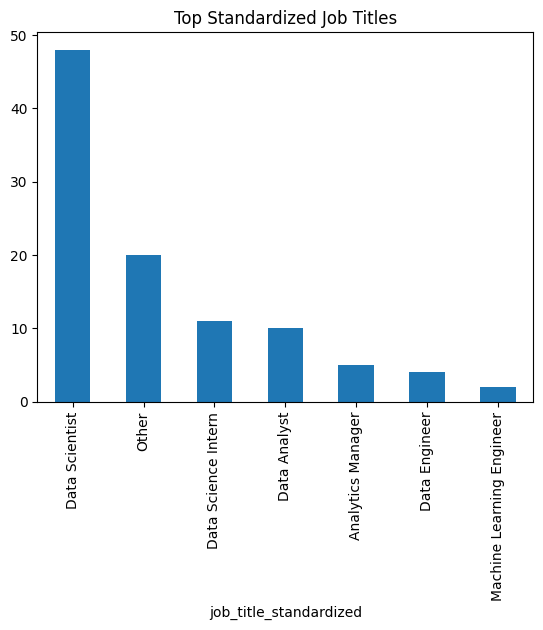

In [22]:
df["job_title_standardized"].value_counts().head(10).plot(kind="bar", title="Top Standardized Job Titles")
plt.show()

In [23]:
df['expired'] = df['expired'].map({True:0, False:1})

<Axes: title={'center': 'Top Hiring Locations'}, xlabel='location'>

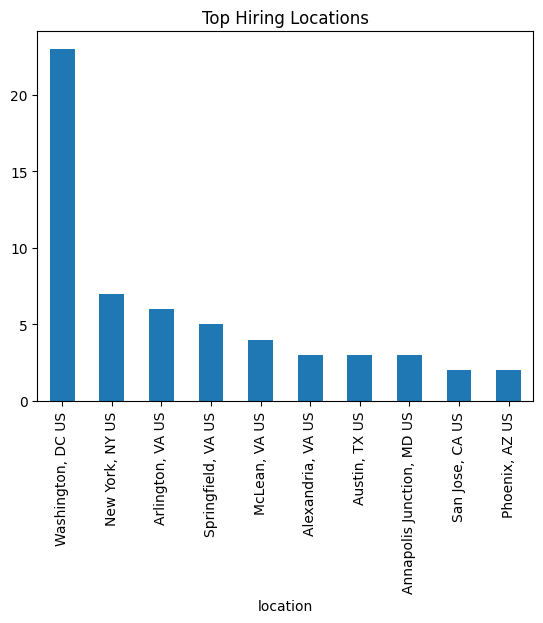

In [24]:
df["location"].value_counts().head(10).plot(kind="bar", title="Top Hiring Locations")

In [25]:
df.drop(columns=['job_title','index_url','listing_url','expired'], inplace=True)

In [26]:
df.columns

Index(['body', 'city', 'company', 'country', 'location', 'post_date', 'state',
       'status_code', 'summary', 'views', 'job_title_standardized'],
      dtype='object')

In [27]:
df.head()

,body,city,company,country,location,post_date,state,status_code,summary,views,job_title_standardized
0,"World Wildlife Fund (WWF), the worldâs leadi...",Washington,World Wildlife Fund,US,"Washington, DC US","Mon, 25 Apr 2016 21:36:16 GMT",DC,200,"Data management, including updating database m...",17,Data Science Intern
1,"Job Description\n\nThe Weather Company, an IBM...",Boston,Ibm,US,"Boston, MA US","Thu, 03 Mar 2016 04:06:28 GMT",MA,200,"Provide expertise in data acquisition, data qu...",10735,Other
2,Job Number: 01203341\n\n\nDescription\n\n\nSo ...,Washington,Booz Allen Hamilton,US,"Washington, DC US","Fri, 15 Apr 2016 07:31:57 GMT",DC,200,Our Data Science team:. Experience in working ...,863,Data Scientist
3,everis is a multinational consulting firm prov...,Washington,Everis Usa,US,"Washington, DC US","Mon, 25 Apr 2016 19:56:40 GMT",DC,200,The Healthcare Data Analyst understands health...,10,Data Analyst
4,CHASE Professionals is currently representing ...,Duluth,Chase Professionals,US,"Duluth, GA US","Mon, 25 Apr 2016 14:28:26 GMT",GA,200,Strong understanding of algorithms and advance...,147,Data Scientist


In [28]:
#clean the date columns
df['post_date'] = pd.to_datetime(df['post_date'], format='%a, %d %b %Y %H:%M:%S %Z', errors='coerce')
df['post_date'].head(5)

0   2016-04-25 21:36:16+00:00
1   2016-03-03 04:06:28+00:00
2   2016-04-15 07:31:57+00:00
3   2016-04-25 19:56:40+00:00
4   2016-04-25 14:28:26+00:00
Name: post_date, dtype: datetime64[ns, UTC]

In [29]:
# # Extract date components
# df['post_year'] = df['post_date'].dt.year
# df['post_month'] = df['post_date'].dt.month
# df['post_day'] = df['post_date'].dt.day
# df['post_weekday'] = df['post_date'].dt.day_name()

# Convert to just date (remove time)
df['post_date_only'] = df['post_date'].dt.date

In [30]:
df['post_date_only']

0     2016-04-25
1     2016-03-03
2     2016-04-15
3     2016-04-25
4     2016-04-25
         ...    
95    2016-04-14
96    2016-04-09
97    2016-03-21
98    2016-03-16
99    2016-04-27
Name: post_date_only, Length: 100, dtype: object

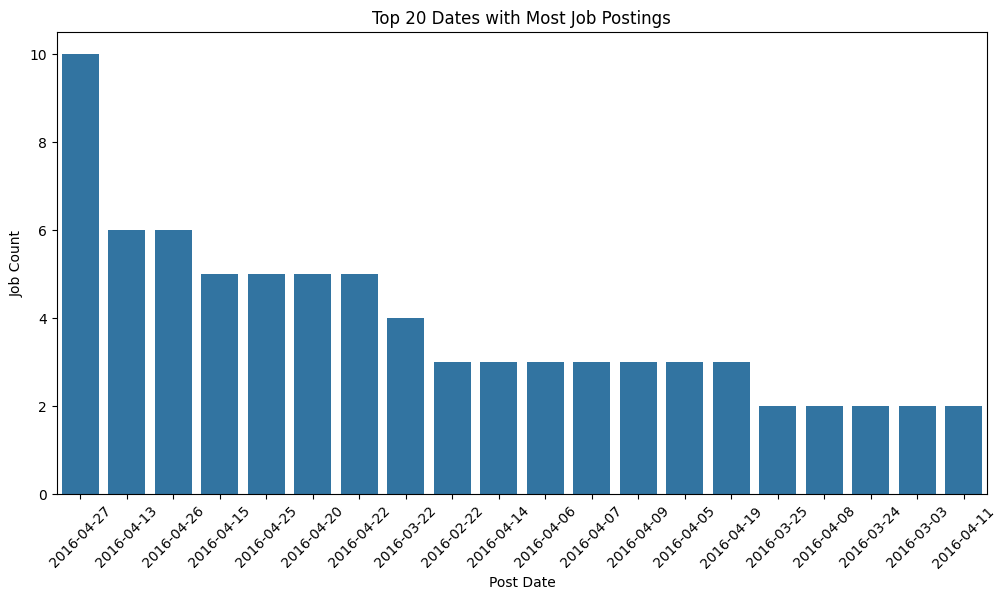

In [31]:
#groupby visualization
df_grouped = df.groupby('post_date_only').size().reset_index(name='job_count')
df_grouped = df_grouped.sort_values(by='job_count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='post_date_only', y='job_count', data=df_grouped.head(20))
plt.xticks(rotation=45)
plt.title('Top 20 Dates with Most Job Postings')
plt.xlabel('Post Date')
plt.ylabel('Job Count')
plt.show()

<Axes: xlabel='views', ylabel='Count'>

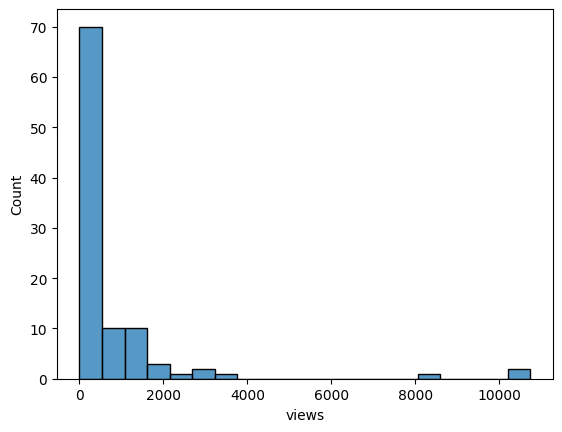

In [32]:
sns.histplot(df['views'].dropna(), bins=20)

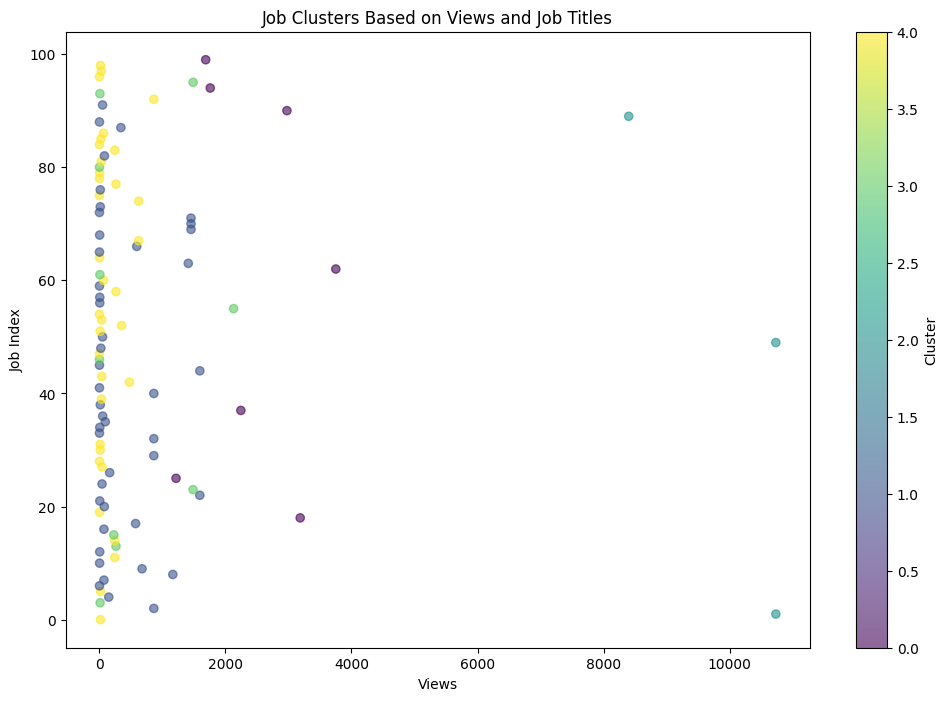


Cluster Distribution:
job_title_standardized  Analytics Manager  Data Analyst  Data Engineer  \
cluster                                                                  
0                                       1             0              1   
1                                       0             0              0   
2                                       0             0              0   
3                                       0            10              0   
4                                       4             0              3   

job_title_standardized  Data Science Intern  Data Scientist  \
cluster                                                       
0                                         0               1   
1                                         0              45   
2                                         0               2   
3                                         0               0   
4                                        11               0   

job_title_standa

In [33]:
# Convert categorical job titles to numerical using one-hot encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import numpy as np

# use numericic and categorcal features for clustering
numeric_features = ['views']
categorical_features = ['job_title_standardized']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])


X = df[numeric_features + categorical_features]
features_encoded = preprocessor.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(features_encoded)

# Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['views'], 
                     range(len(df)), 
                     c=df['cluster'], 
                     cmap='viridis', 
                     alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Job Clusters Based on Views and Job Titles')
plt.xlabel('Views')
plt.ylabel('Job Index')
plt.show()

# Show cluster distribution
print("\nCluster Distribution:")
print(df.groupby(['cluster', 'job_title_standardized']).size().unstack(fill_value=0))

In [34]:
#save the cleaned data
df.to_csv('../Data/cleaned_indeed_job_listings.csv', index=False)

In [42]:
# Skill Extraction from Job Summaries
import re
from collections import Counter

# Define comprehensive list of skills to look for
skills_list = [
    # Programming Languages
    'python', 'r', 'java', 'sql', 'scala', 'julia', 'matlab', 'sas', 'spss',
    'javascript', 'c++', 'c#', 'go', 'rust', 'perl', 'ruby', 'php',
    
    # Data Science & ML Libraries
    'pandas', 'numpy', 'scikit-learn', 'sklearn', 'tensorflow', 'pytorch', 'keras',
    'matplotlib', 'seaborn', 'plotly', 'ggplot2', 'dplyr', 'tidyr', 'caret',
    'scipy', 'statsmodels', 'xgboost', 'lightgbm', 'catboost',
    
    # Big Data & Cloud
    'hadoop', 'spark', 'hive', 'pig', 'kafka', 'storm', 'flink', 'airflow',
    'aws', 'azure', 'gcp', 'google cloud', 'amazon web services', 'ec2', 's3',
    'redshift', 'bigquery', 'snowflake', 'databricks',
    
    # Databases
    'mysql', 'postgresql', 'mongodb', 'cassandra', 'redis', 'elasticsearch',
    'oracle', 'sqlite', 'hbase', 'dynamodb', 'cosmos db', 'teradata',
    
    # Analytics & BI Tools
    'tableau', 'power bi', 'looker', 'qlik', 'microstrategy', 'business objects',
    'excel', 'google analytics', 'adobe analytics',
    
    # Machine Learning Concepts
    'machine learning', 'deep learning', 'neural networks', 'nlp', 'computer vision',
    'natural language processing', 'recommendation systems', 'time series',
    'supervised learning', 'unsupervised learning', 'reinforcement learning',
    'random forest', 'gradient boosting', 'svm', 'support vector machines',
    'linear regression', 'logistic regression', 'clustering', 'classification',
    'ensemble methods', 'feature engineering', 'model validation', 'cross validation',
    
    # Statistical Methods
    'statistics', 'statistical analysis', 'hypothesis testing', 'a/b testing',
    'experimental design', 'anova', 'regression analysis', 'multivariate analysis',
    'bayesian', 'monte carlo', 'bootstrap', 'pca', 'factor analysis',
    
    # Data Engineering
    'etl', 'data pipeline', 'data warehouse', 'data lake', 'stream processing',
    'batch processing', 'data modeling', 'data architecture', 'data governance',
    'apache', 'kubernetes', 'docker', 'jenkins', 'git', 'version control',
    
    # Visualization & Reporting
    'data visualization', 'dashboard', 'reporting', 'kpi', 'metrics',
    'storytelling', 'data storytelling', 'infographics',
    
    # Domain Knowledge
    'business intelligence', 'predictive analytics', 'prescriptive analytics',
    'market research', 'customer analytics', 'web analytics', 'social media analytics',
    'financial modeling', 'risk analysis', 'fraud detection', 'healthcare analytics',
    'marketing analytics', 'operations research', 'optimization',
    
    # Soft Skills
    'communication', 'presentation', 'stakeholder management', 'project management',
    'problem solving', 'critical thinking', 'analytical thinking'
]

In [41]:
def extract_skills_from_text(text):
    """
    Extract skills from job description text
    
    Args:
        text: Job description text
        
    Returns:
        List of skills found in the text
    """
    if pd.isna(text) or text == "":
        return []
    
    #removing special characters and normalizing text
    text_lower = str(text).lower()
    text_clean = re.sub(r'[^\w\s]', ' ', text_lower)
    text_clean = re.sub(r'\s+', ' ', text_clean)
    
    found_skills = []
    
    for skill in skills_list:
        pattern = r'\b' + re.escape(skill.lower()) + r'\b' # Use word boundaries to avoid partial matches
        if re.search(pattern, text_clean):
            found_skills.append(skill.title())
    
    return found_skills

# Apply skill extraction to the summary column
print("Extracting skills from job summaries...")
df['extracted_skills'] = df['summary'].apply(extract_skills_from_text)

# Create a column with comma-separated skills for easier viewing
df['skills_text'] = df['extracted_skills'].apply(lambda x: ', '.join(x) if x else 'No skills extracted')

# Display sample results
print("\nSample of extracted skills:")
for i in range(5):
    if i < len(df):
        print(f"\nJob {i+1} ({df.iloc[i]['job_title_standardized']}):")
        print(f"Skills: {df.iloc[i]['skills_text']}")
        print(f"Summary excerpt: {df.iloc[i]['summary'][:100]}...")

Extracting skills from job summaries...

Sample of extracted skills:

Job 1 (Data Science Intern):
Skills: No skills extracted
Summary excerpt: Data management, including updating database metadata and database maintenance. Gain exposure to a w...

Job 2 (Other):
Skills: No skills extracted
Summary excerpt: Provide expertise in data acquisition, data quality and data management. Work with minimal oversight...

Job 3 (Data Scientist):
Skills: No skills extracted
Summary excerpt: Our Data Science team:. Experience in working with massive data sets, including structured and struc...

Job 4 (Data Analyst):
Skills: No skills extracted
Summary excerpt: The Healthcare Data Analyst understands healthcare data and knows how to leverage and structure the ...

Job 5 (Data Scientist):
Skills: Statistics
Summary excerpt: Strong understanding of algorithms and advanced data structures. Bachelor’s Degree in Computer Scien...


Skill extraction complete!
Total jobs processed: 100
Jobs with extracted skills: 34
Jobs without skills: 66

Top 20 Most Mentioned Skills:
Data Visualization: 10
Statistics: 9
Machine Learning: 7
Reporting: 3
Etl: 3
Data Warehouse: 2
Tableau: 2
Dashboard: 2
Sql: 2
Storytelling: 2
Statistical Analysis: 2
Hadoop: 1
Data Modeling: 1
Operations Research: 1
Nlp: 1
Predictive Analytics: 1
Optimization: 1
Excel: 1
Communication: 1
Project Management: 1


C:\Users\supre\AppData\Local\Temp\ipykernel_9884\3920377102.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_skills_df, x='Count', y='Skill', palette='viridis')


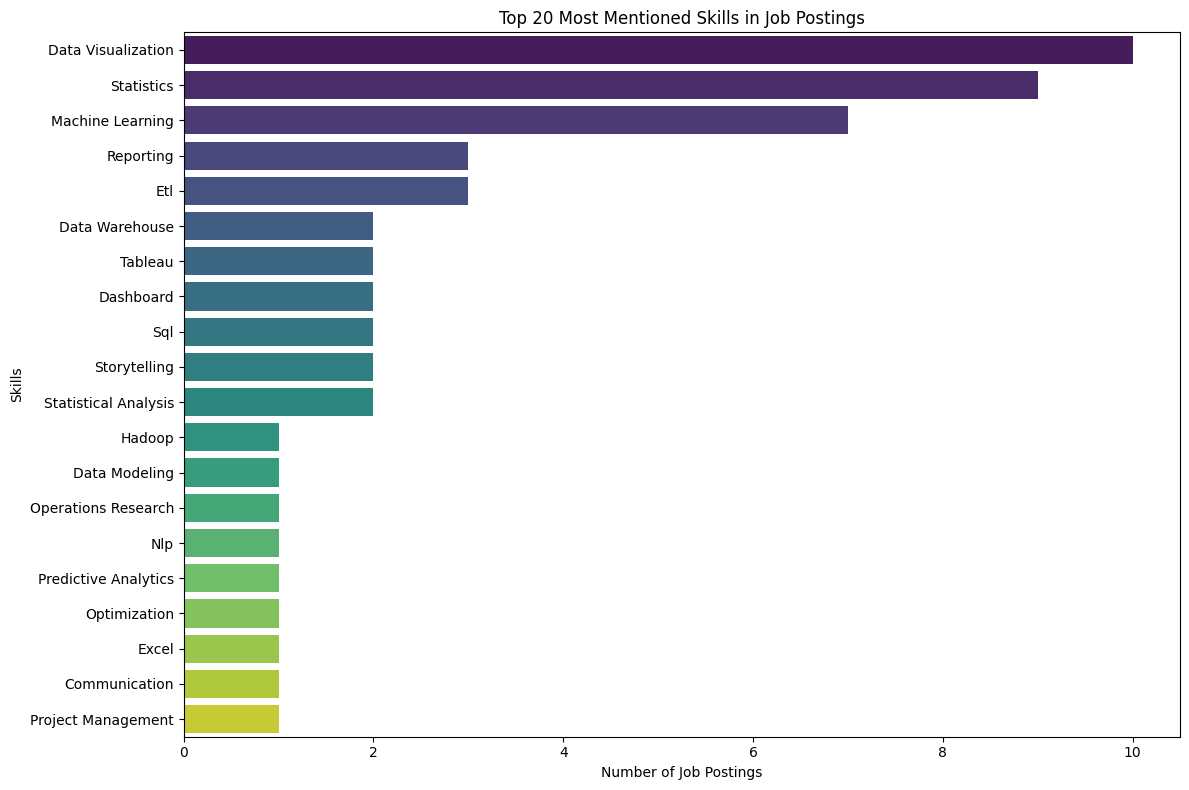

In [ ]:
# Analyze the extracted skills
print("Skill extraction complete!")
print(f"Total jobs processed: {len(df)}")
print(f"Jobs with extracted skills: {(df['extracted_skills'].str.len() > 0).sum()}")
print(f"Jobs without skills: {(df['extracted_skills'].str.len() == 0).sum()}")

all_skills = []
for skills in df['extracted_skills']:
    all_skills.extend(skills)

skill_counts = Counter(all_skills)

print("\nTop 20 Most Mentioned Skills:")
top_skills = skill_counts.most_common(20)
for skill, count in top_skills:
    print(f"{skill}: {count}")

C:\Users\supre\AppData\Local\Temp\ipykernel_9884\1651365365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_skills_df, x='Count', y='Skill', palette='viridis')


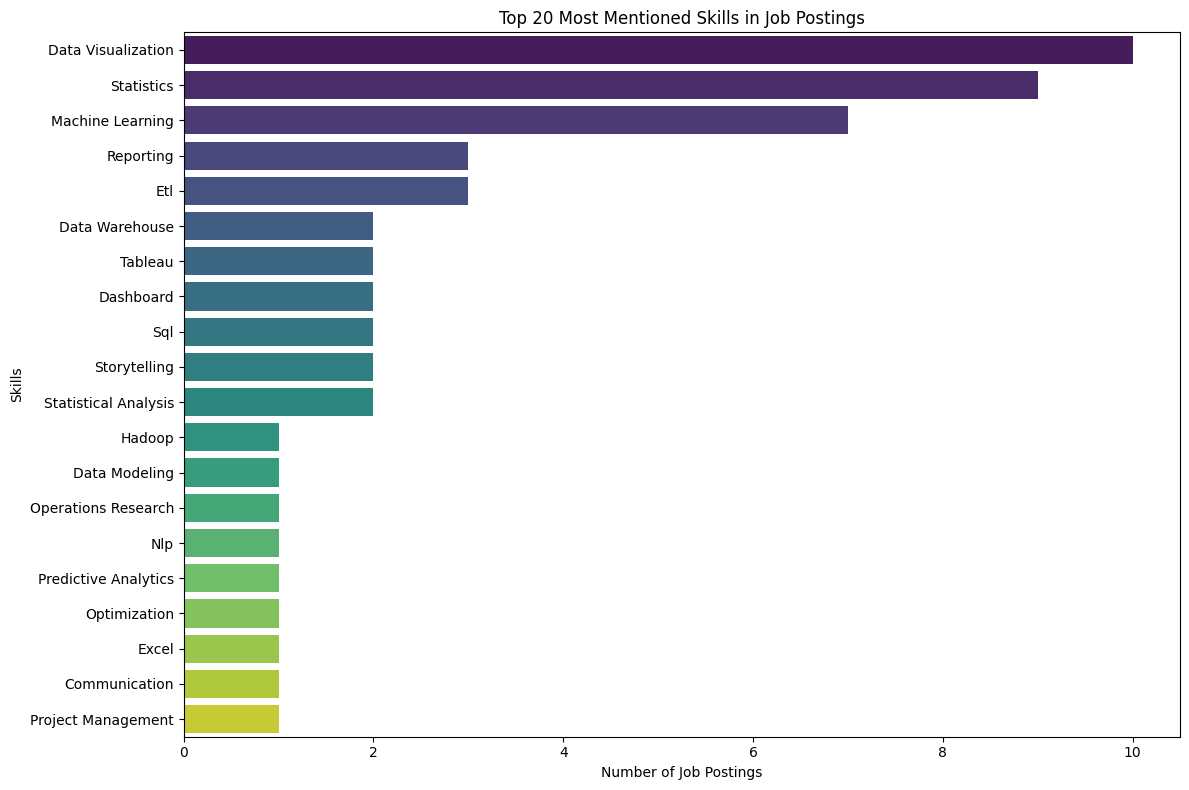

In [ ]:
# Create a dataframe for visualization
top_skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])

# Visualize top skills
plt.figure(figsize=(12, 8))
sns.barplot(data=top_skills_df, x='Count', y='Skill', palette='viridis')
plt.title('Top 20 Most Mentioned Skills in Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Skills')
plt.tight_layout()
plt.show()


Skills by Job Title Category:

Data Science Intern:
  Data Warehouse: 2
  Data Visualization: 1
  Hadoop: 1

Other:
  Data Visualization: 2
  Storytelling: 2
  Sql: 1
  Etl: 1

Data Scientist:
  Statistics: 7
  Machine Learning: 6
  Data Visualization: 5
  Etl: 2
  Data Modeling: 1

Data Analyst:
  Tableau: 2
  Data Visualization: 2
  Dashboard: 2
  Statistical Analysis: 2
  Reporting: 2

Machine Learning Engineer:

Analytics Manager:
  Reporting: 1
  Communication: 1

Data Engineer:
  Machine Learning: 1
  Statistics: 1

Skill Categories Distribution:
Visualization: 12
Statistics: 11
Machine Learning: 7
Programming Languages: 4
Big Data: 1


C:\Users\supre\AppData\Local\Temp\ipykernel_9884\1676668495.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=categories, palette='plasma')


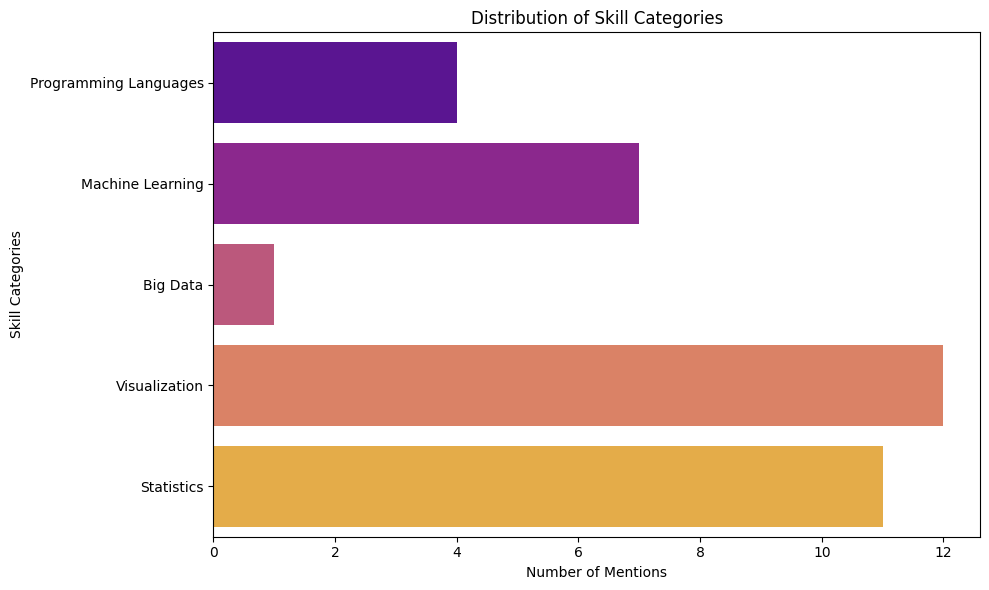

In [37]:
# Skills analysis by job title
print("\nSkills by Job Title Category:")
skills_by_job = df.groupby('job_title_standardized')['extracted_skills'].apply(
    lambda x: [skill for sublist in x for skill in sublist]
).apply(Counter)

for job_title in df['job_title_standardized'].unique():
    if job_title in skills_by_job.index:
        top_skills_for_job = skills_by_job[job_title].most_common(5)
        print(f"\n{job_title}:")
        for skill, count in top_skills_for_job:
            print(f"  {skill}: {count}")

# Create skill categories
def categorize_skills(skills_list):
    """Categorize skills into different groups"""
    categories = {
        'Programming Languages': ['Python', 'R', 'Java', 'Sql', 'Scala', 'Julia', 'Matlab', 'Sas', 'Spss'],
        'Machine Learning': ['Machine Learning', 'Deep Learning', 'Neural Networks', 'Scikit-Learn', 'Tensorflow', 'Pytorch'],
        'Big Data': ['Hadoop', 'Spark', 'Hive', 'Kafka', 'Aws', 'Azure', 'Gcp'],
        'Visualization': ['Tableau', 'Power Bi', 'Matplotlib', 'Seaborn', 'Plotly', 'Data Visualization'],
        'Statistics': ['Statistics', 'Statistical Analysis', 'Regression Analysis', 'Hypothesis Testing']
    }
    
    categorized = {cat: [] for cat in categories}
    
    for skill in skills_list:
        skill_title = skill.title()
        for category, cat_skills in categories.items():
            if skill_title in cat_skills:
                categorized[category].append(skill_title)
                break
    
    return categorized

# Apply categorization to each job
df['skill_categories'] = df['extracted_skills'].apply(categorize_skills)

# Create summary of skill categories
category_counts = {}
for categories in df['skill_categories']:
    for category, skills in categories.items():
        if category not in category_counts:
            category_counts[category] = 0
        category_counts[category] += len(skills)

print("\nSkill Categories Distribution:")
for category, count in sorted(category_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{category}: {count}")

# Visualize skill categories
plt.figure(figsize=(10, 6))
categories = list(category_counts.keys())
counts = list(category_counts.values())
sns.barplot(x=counts, y=categories, palette='plasma')
plt.title('Distribution of Skill Categories')
plt.xlabel('Number of Mentions')
plt.ylabel('Skill Categories')
plt.tight_layout()
plt.show()

In [46]:
# Export the cleaned data with extracted skills
print("Saving cleaned data with extracted skills...")

# Create a final cleaned dataset
df_final = df.copy()

# Add useful columns for analysis
df_final['num_skills'] = df_final['extracted_skills'].str.len()
df_final['has_programming'] = df_final['extracted_skills'].apply(
    lambda x: any(skill.lower() in ['python', 'r', 'java', 'sql'] for skill in x)
)
df_final['has_ml'] = df_final['extracted_skills'].apply(
    lambda x: any('machine learning' in skill.lower() or 'deep learning' in skill.lower() for skill in x)
)

df_final.to_csv('../data/cleaned_indeed_job_listings_with_skills.csv', index=False)
print("Data saved to 'cleaned_indeed_job_listings_with_skills.csv'")

Saving cleaned data with extracted skills...
Data saved to 'cleaned_indeed_job_listings_with_skills.csv'


In [44]:
print("FINAL DATA SUMMARY")
print(f"Total jobs: {len(df_final)}")
print(f"Average skills per job: {df_final['num_skills'].mean():.2f}")
print(f"Jobs with programming skills: {df_final['has_programming'].sum()} ({df_final['has_programming'].mean()*100:.1f}%)")
print(f"Jobs with ML skills: {df_final['has_ml'].sum()} ({df_final['has_ml'].mean()*100:.1f}%)")
print(f"Most common job title: {df_final['job_title_standardized'].mode()[0]}")
print(f"Most common location: {df_final['location'].mode()[0]}")
print(f"Date range: {df_final['post_date_only'].min()} to {df_final['post_date_only'].max()}")

print(f"\nColumns in final dataset: {list(df_final.columns)}")

print("\n Skill extraction and data cleaning completed successfully!")

FINAL DATA SUMMARY
Total jobs: 100
Average skills per job: 0.55
Jobs with programming skills: 3 (3.0%)
Jobs with ML skills: 7 (7.0%)
Most common job title: Data Scientist
Most common location: Washington, DC US
Date range: 2016-01-15 to 2016-04-27

Columns in final dataset: ['body', 'city', 'company', 'country', 'location', 'post_date', 'state', 'status_code', 'summary', 'views', 'job_title_standardized', 'post_date_only', 'cluster', 'extracted_skills', 'skills_text', 'skill_categories', 'num_skills', 'has_programming', 'has_ml']

 Skill extraction and data cleaning completed successfully!
